In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Multinomial Logistic Regression

$$\mathbb{P}(y = j) = \text{softmax}(z_1, \ldots, z_K) = \frac{\exp(z_j)}{\sum_{i=1}^{K}\exp(z_i)}, \quad z_j = \mathbf{x}^T\mathbf{w}_j$$

## Settings and Data Loading

In [2]:
# Hyperparameters
batch_size = 256
learning_rate = 0.1
num_epochs = 10
random_seed = 0

# Architecture
num_features = 28 * 28
num_classes = 10

train = datasets.MNIST(root='data',
                        train=True, 
                        transform=transforms.ToTensor(),  
                        download=True)

test = datasets.MNIST(root='data',
                        train=False, 
                        transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train,
                          batch_size=batch_size, 
                          shuffle=True)

test_loader = DataLoader(dataset=test, 
                         batch_size=batch_size, 
                         shuffle=False)

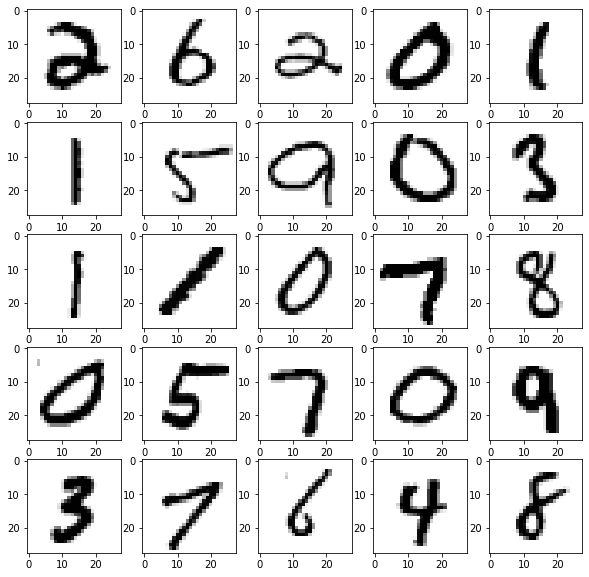

In [3]:
# Display sample images
for img, label in train_loader:
    fig, ax = plt.subplots(5, 5, figsize = (10, 10))
    for i in range(5):
        for j in range(5):
            ax[i][j].imshow(img[5 * i + j].numpy()[0], cmap="binary")
    plt.show()
    break

## Model Definition and Training

In [17]:
class MultinomialRegression(torch.nn.Module):

    def __init__(self, num_features, num_classes):
        super(MultinomialRegression, self).__init__()
        self.linear = torch.nn.Linear(num_features, num_classes)

    def forward(self, x):
        logits = self.linear(x)
        probas = torch.softmax(logits, dim=1)
        return logits, probas

def compute_accuracy(model, data_loader):
    correct, num_examples = 0, 0
    for features, target in data_loader:
        features = features.view(-1, 28*28)
        _, probas = model(features)
        _, predicted = torch.max(probas, dim=1)
        num_examples += target.shape[0]
        correct += sum(predicted == target)
    return correct.float() / num_examples * 100

model = MultinomialRegression(num_features, num_classes)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
cost_fn = torch.nn.CrossEntropyLoss()

train_acc = []
test_acc = []

for epoch in range(num_epochs):
    for batch_idx, (X_train, y_train) in enumerate(train_loader):
        X_train = X_train.view(-1, 28*28)

        # Feed forward
        logits, probas = model(X_train)

        # Compute the cost
        cost = cost_fn(logits, y_train)
        optimizer.zero_grad()
        cost.backward()
        
        # Update the weights
        optimizer.step()
        
        # Logging
        if batch_idx % 50 == 0:
            print('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                   %(epoch + 1, num_epochs, batch_idx, batch_size, cost))

    acc = compute_accuracy(model, train_loader)
    print('Epoch: %03d/%03d training accuracy: %.2f%%' % (
        epoch + 1, num_epochs, acc
    ))
    train_acc.append(acc)
    test_acc.append(compute_accuracy(model, test_loader))

Epoch: 001/010 | Batch 000/256 | Cost: 2.3265
Epoch: 001/010 | Batch 050/256 | Cost: 0.8910
Epoch: 001/010 | Batch 100/256 | Cost: 0.5866
Epoch: 001/010 | Batch 150/256 | Cost: 0.5121
Epoch: 001/010 | Batch 200/256 | Cost: 0.4586
Epoch: 001/010 training accuracy: 88.12%
Epoch: 002/010 | Batch 000/256 | Cost: 0.5006
Epoch: 002/010 | Batch 050/256 | Cost: 0.4425
Epoch: 002/010 | Batch 100/256 | Cost: 0.4854
Epoch: 002/010 | Batch 150/256 | Cost: 0.4612
Epoch: 002/010 | Batch 200/256 | Cost: 0.4257
Epoch: 002/010 training accuracy: 89.31%
Epoch: 003/010 | Batch 000/256 | Cost: 0.3213
Epoch: 003/010 | Batch 050/256 | Cost: 0.2898
Epoch: 003/010 | Batch 100/256 | Cost: 0.3854
Epoch: 003/010 | Batch 150/256 | Cost: 0.4293
Epoch: 003/010 | Batch 200/256 | Cost: 0.2933
Epoch: 003/010 training accuracy: 89.91%
Epoch: 004/010 | Batch 000/256 | Cost: 0.4070
Epoch: 004/010 | Batch 050/256 | Cost: 0.3225
Epoch: 004/010 | Batch 100/256 | Cost: 0.3360
Epoch: 004/010 | Batch 150/256 | Cost: 0.3545
Epo

In [18]:
print('Test accuracy: %.2f%%' % (compute_accuracy(model, test_loader)))

Test accuracy: 91.75%


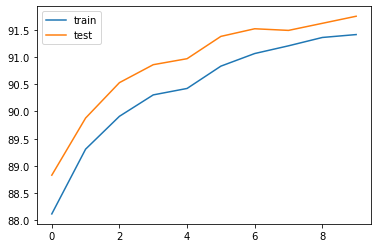

In [24]:
plt.plot(train_acc, label="train")
plt.plot(test_acc, label="test")
plt.legend()
plt.show()